## **The following are the 3 improvements over 1st Vanilla network:**
### 1) Channels and layers increased
### 2) Batch Normalization is used
### 3) MaxPooling used twice
### Observation: Increasing the channels has increased number of parameters. It improved validation accuracy however there is still wide gap between training and validation accuracy

#### Installing keras library and importing keras

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


#### Importing numpy package and importing keras modules Sequential (layers placed one after other linearly), Flatten (Data format will be changed to 1D), Convolutions2D (Provides convolutional layer in 2D spatial domain), Dropout(randomly sets some of the weights to 0 to prevent overfitting), Activation(provides activation functionality), Maxpooling2D (passes the maximum value within a kernel region to next layer). Also importing mnist dataset.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

#### To load the MNIST dataset( contains 28x28 handwritten digit images). It has 60000 images for training and 10000 images for testing and is saved as X_train and X_test respectively. It labels them as y_train and y_test

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Prints the shape of the training set and plots the 1st image of the training set

(60000, 28, 28)


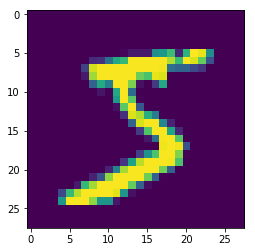

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

#### The following block reshapes the training and testing image samples into 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#### The following block of code modifies the type of the image intensities to float and then normalizes the intensities to be within the range of 0-1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### Considering the 1st 10 labels of training data

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### To convert 1D array to 10D array

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Verifying the 10D converted array for 1st 10 labels of training data

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Model is Defined
### The following are the 3 improvements over 1st Vanilla network:
#### 1) Channels and layers increased
#### 2) Batch Normalization is used
#### 3) MaxPooling used twice

#### Observation: Increasing the channels has increased number of parameters. It improved validation accuracy however there is still wide gap between training and validation accuracy


In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3, activation='relu')) #24
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(10, 1, activation='relu')) #12
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) #10
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #5

model.add(Convolution2D(10, 3, 3, activation='relu')) #3
model.add(BatchNormalization())

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


### 22448 parameters are used

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        650       
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 10)        40        
__________

#### Loss function is selected along with adam optimizer

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Batch size of 32 used with upto 20 epochs. 99.14% of vaidation accuracy is achieved in 15th epoch.

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test)) #.9914

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.1885 - acc: 0.9462 - val_loss: 0.0737 - val_acc: 0.9768
Epoch 2/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.0584 - acc: 0.9820 - val_loss: 0.0483 - val_acc: 0.9834
Epoch 3/20
60000/60000 [==============================] - 16s 262us/step - loss: 0.0470 - acc: 0.9855 - val_loss: 0.0419 - val_acc: 0.9860
Epoch 4/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0391 - acc: 0.9882 - val_loss: 0.0388 - val_acc: 0.9877
Epoch 5/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.0355 - acc: 0.9887 - val_loss: 0.0312 - val_acc: 0.9892
Epoch 6/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0305 - acc: 0.9903 - val_loss: 0.0324 - val_acc: 0.9896
Epoch 7/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.0267 - acc: 0.9912 - val_loss: 0.

#### The test data is being validated on the trained model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Test validation score is printed

In [0]:
print(score)

[0.033036514077442555, 0.991]


#### Model trained is used to predict the testing data

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.66712119e-12 8.03928376e-13 3.88046574e-11 1.09098821e-07
  1.53772701e-15 3.71394859e-11 2.83354467e-19 9.99999881e-01
  1.35341675e-13 3.55744635e-11]
 [1.08729159e-09 3.19520517e-08 1.00000000e+00 1.95350819e-10
  8.71849996e-15 2.61170135e-17 4.08741352e-09 3.59258684e-13
  9.17056795e-12 7.54962702e-14]
 [3.50235535e-11 9.99987006e-01 7.94797739e-09 3.27923175e-11
  1.08077711e-05 6.32450892e-09 3.45820609e-07 1.84861779e-06
  8.45161008e-09 1.60892615e-08]
 [9.99999285e-01 1.94268650e-14 6.07901285e-09 6.68202507e-11
  7.07307531e-13 8.46897663e-10 7.42723159e-07 2.41529041e-12
  4.72667994e-09 3.61664448e-11]
 [1.79735394e-14 1.68971513e-13 1.31041782e-14 1.50370879e-14
  9.99999881e-01 9.74599524e-13 1.02308044e-10 1.28768752e-14
  7.36937594e-12 8.06486042e-08]
 [1.22014759e-10 9.99971747e-01 1.23065478e-08 1.24960129e-11
  3.05859112e-06 2.15528484e-09 1.49240496e-08 2.51315996e-05
  2.48990588e-08 4.19342161e-09]
 [9.71320333e-12 1.88790690e-08 3.65622338e-10 2.78058322e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

#### Visualizing the test data outputs

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored